## 网格搜索

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
param_grid = [
    {
        'weights': ['uniform'], 
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)], 
        'p': [i for i in range(1, 6)]
    }
]

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
knn_clf = KNeighborsClassifier()

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
grid_search = GridSearchCV(knn_clf, param_grid)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [9]:
%%time
grid_search.fit(X_train, y_train)

CPU times: user 2min 8s, sys: 0 ns, total: 2min 8s
Wall time: 2min 9s


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [10]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [11]:
grid_search.best_score_

0.9860820751064653

In [12]:
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [13]:
knn_clf = grid_search.best_estimator_

In [14]:
knn_clf.predict(X_test)

array([8, 1, 3, 4, 4, 0, 7, 0, 8, 0, 4, 6, 1, 1, 2, 0, 1, 6, 7, 3, 3, 6,
       3, 2, 9, 4, 0, 2, 0, 3, 0, 8, 7, 2, 3, 5, 1, 3, 1, 5, 8, 6, 2, 6,
       3, 1, 3, 0, 0, 4, 9, 9, 2, 8, 7, 0, 5, 4, 0, 9, 5, 5, 9, 3, 4, 2,
       8, 8, 7, 1, 4, 3, 0, 2, 7, 2, 1, 2, 4, 0, 9, 0, 6, 6, 2, 0, 0, 5,
       4, 4, 3, 1, 3, 8, 6, 4, 4, 7, 5, 6, 8, 4, 8, 4, 6, 9, 7, 7, 0, 8,
       8, 3, 9, 7, 1, 8, 4, 2, 7, 0, 0, 4, 9, 6, 7, 3, 4, 6, 4, 8, 4, 7,
       2, 6, 5, 5, 8, 7, 2, 5, 5, 9, 7, 9, 3, 1, 9, 4, 4, 1, 5, 1, 6, 4,
       4, 8, 1, 6, 2, 5, 2, 1, 4, 4, 3, 9, 4, 0, 6, 0, 8, 3, 8, 7, 3, 0,
       3, 0, 5, 9, 2, 7, 1, 8, 1, 4, 3, 3, 7, 8, 2, 7, 2, 2, 8, 0, 5, 7,
       6, 7, 3, 4, 7, 1, 7, 0, 9, 2, 8, 9, 3, 8, 9, 1, 1, 1, 9, 8, 8, 0,
       3, 7, 3, 3, 4, 8, 2, 1, 8, 6, 0, 1, 7, 7, 5, 8, 3, 8, 7, 6, 8, 4,
       2, 6, 2, 3, 7, 4, 9, 3, 5, 0, 6, 3, 8, 3, 3, 1, 4, 5, 3, 2, 5, 6,
       8, 6, 9, 5, 5, 3, 6, 5, 9, 3, 7, 7, 0, 2, 4, 9, 9, 9, 2, 5, 6, 1,
       9, 6, 9, 7, 7, 4, 5, 0, 0, 5, 3, 8, 4, 4, 3,

In [16]:
%%time
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.7s


CPU times: user 1.08 s, sys: 140 ms, total: 1.22 s
Wall time: 43.3 s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   43.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=1, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

# 数据归一化

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 最值归一化 Normalization

In [19]:
x = np.random.randint(0, 100, size=100)

In [20]:
x

array([99, 13, 89, 85,  4, 20, 51, 43, 13,  7, 62, 38, 43, 24,  6, 59, 80,
       87, 16, 35,  7, 35, 37, 43, 72, 71, 64, 44, 55, 11, 70, 46, 10, 23,
       98, 40, 89, 29, 64, 91, 67, 65, 93,  2, 74, 50, 90, 33, 31, 71, 90,
       63, 99, 28, 58, 36, 49, 97, 68, 78, 20, 57, 88, 74,  7, 59, 30, 49,
       25, 87, 45, 11, 31, 84, 97, 74, 27, 27,  5, 44,  0, 61, 87, 44, 34,
       53, 68,  3, 20, 18, 95, 57, 11,  6, 83,  8, 37, 55, 42, 58])

In [22]:
(x - np.min(x))/(np.max(x)-np.min(x))

array([1.        , 0.13131313, 0.8989899 , 0.85858586, 0.04040404,
       0.2020202 , 0.51515152, 0.43434343, 0.13131313, 0.07070707,
       0.62626263, 0.38383838, 0.43434343, 0.24242424, 0.06060606,
       0.5959596 , 0.80808081, 0.87878788, 0.16161616, 0.35353535,
       0.07070707, 0.35353535, 0.37373737, 0.43434343, 0.72727273,
       0.71717172, 0.64646465, 0.44444444, 0.55555556, 0.11111111,
       0.70707071, 0.46464646, 0.1010101 , 0.23232323, 0.98989899,
       0.4040404 , 0.8989899 , 0.29292929, 0.64646465, 0.91919192,
       0.67676768, 0.65656566, 0.93939394, 0.02020202, 0.74747475,
       0.50505051, 0.90909091, 0.33333333, 0.31313131, 0.71717172,
       0.90909091, 0.63636364, 1.        , 0.28282828, 0.58585859,
       0.36363636, 0.49494949, 0.97979798, 0.68686869, 0.78787879,
       0.2020202 , 0.57575758, 0.88888889, 0.74747475, 0.07070707,
       0.5959596 , 0.3030303 , 0.49494949, 0.25252525, 0.87878788,
       0.45454545, 0.11111111, 0.31313131, 0.84848485, 0.97979

In [23]:
X = np.random.randint(0, 100, (50, 2))

In [24]:
X[:10, :]

array([[70,  3],
       [87, 10],
       [49, 51],
       [98, 48],
       [24, 18],
       [39,  0],
       [18, 62],
       [57, 84],
       [85, 11],
       [86, 96]])

In [25]:
X = np.array(X, dtype=float)

In [26]:
X[:,0] = (X[:,0] - np.min(X[:,0]))/(np.max(X[:,0]) - np.min(X[:,0]))

In [27]:
X[:,1] = (X[:,1] - np.min(X[:,1]))/(np.max(X[:,1]) - np.min(X[:,1]))

In [28]:
X[:10,:]

array([[0.70103093, 0.03030303],
       [0.87628866, 0.1010101 ],
       [0.48453608, 0.51515152],
       [0.98969072, 0.48484848],
       [0.22680412, 0.18181818],
       [0.3814433 , 0.        ],
       [0.16494845, 0.62626263],
       [0.56701031, 0.84848485],
       [0.8556701 , 0.11111111],
       [0.86597938, 0.96969697]])

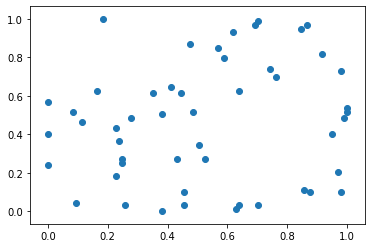

In [29]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [30]:
np.mean(X[:,0])

0.5232989690721649

In [31]:
np.std(X[:,0])

0.3030476156820948

In [32]:
np.mean(X[:,1])

0.46505050505050505

In [33]:
np.std(X[:,1])

0.30626529142519904

# 均值方差归一化 Standardization

In [34]:
X2 = np.random.randint(0, 100, (50, 2))

In [35]:
X2 = np.array(X2, dtype=float)

In [36]:
X2[:,0] = (X2[:,0] - np.mean(X2[:,0]))/np.std(X2[:,0])

In [37]:
X2[:,1] = (X2[:,1] - np.mean(X2[:,1]))/np.std(X2[:,1])

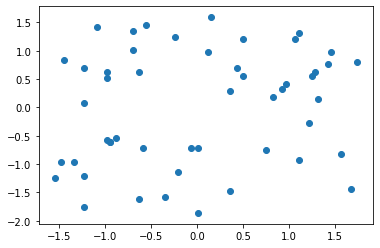

In [38]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [39]:
X2[:,1].mean()

-3.552713678800501e-17

In [40]:
X2[:,1].std()

1.0

In [41]:
np.mean(X2[:,0])

5.995204332975846e-17

In [42]:
np.std(X2[:,0])

1.0